In [ ]:
import pandas as pd
import re
from textblob import TextBlob
import numpy as np
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
data=pd.read_csv("final_data.csv")

In [ ]:
data.head(10)

,review_id,user_id,business_id,review_stars,useful,funny,cool,text,date,name,address,city,state,postal_code,latitude,longitude,business_stars,review_count,is_open,attributes,categories,hours
0,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52,Rio Hair Salon,2990 N Alma School Rd,Chandler,AZ,85224,33.348382,-111.859189,1.5,3.0,1.0,NaN,"Beauty & Spas, Hair Salons",NaN
1,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,Deagan's Kitchen & Bar,14810 Detroit Ave,Lakewood,OH,44107,41.485192,-81.800145,4.0,417.0,1.0,NaN,"Restaurants, Gastropubs, Nightlife, American (...",NaN
2,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52,Cabo Mexican Restaurant,"Red Rock Casino Resort & Spa, 11014 W Charlest...",Las Vegas,NV,89135,36.118343,-115.338821,3.5,56.0,0.0,NaN,"Restaurants, Mexican",NaN
3,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57,Raising Cane's Chicken Fingers,110 N Stephanie St,Henderson,NV,89074,36.035068,-115.046353,3.5,159.0,1.0,NaN,"Fast Food, Restaurants, Sandwiches, Chicken Wings",NaN
4,L2O_INwlrRuoX05KSjc4eg,5vD2kmE25YBrbayKhykNxQ,nlxHRv1zXGT0c0K51q3jDg,5.0,2,0,0,This is definitely my favorite fast food sub s...,2013-05-07 07:25:25,Firehouse Subs,"510 Marks St, Unit B-1, Ste 110",Henderson,NV,89014,36.059969,-115.036032,3.0,93.0,1.0,NaN,"Restaurants, Delis, Sandwiches, Fast Food",NaN
5,ZayJ1zWyWgY9S_TRLT_y9Q,aq_ZxGHiri48TUXJlpRkCQ,Pthe4qk5xh4n-ef-9bvMSg,5.0,1,0,0,"Really good place with simple decor, amazing f...",2015-11-05 23:11:05,Chon Thai Food,"2330 N Alma School Rd, Ste 116",Chandler,AZ,85224,33.339962,-111.859727,4.5,555.0,1.0,NaN,"Restaurants, Thai",NaN
6,lpFIJYpsvDxyph-kPzZ6aA,dsd-KNYKMpx6ma_sRWCSkQ,FNCJpSn0tL9iqoY3JC73qw,5.0,0,0,0,"Awesome office and staff, very professional an...",2017-07-18 18:31:54,Centennial Dermatology & Skin Cancer,"5550 Painted Mirage Rd, Ste 200",Las Vegas,NV,89149,36.261891,-115.256347,4.0,79.0,1.0,NaN,"Doctors, Cosmetic Surgeons, Dermatologists, He...",NaN
7,JA-xnyHytKiOIHl_ztnK9Q,P6apihD4ASf1vpPxHODxAQ,e_BiI4ej1CW1F0EyVLr-FQ,5.0,0,0,0,Most delicious authentic Italian I've had in t...,2015-02-16 06:48:47,Casa Mia,11485 N 136th St,Scottsdale,AZ,85259,33.590695,-111.786547,4.5,85.0,1.0,NaN,"Restaurants, Italian",NaN
8,z4BCgTkfNtCu4XY5Lp97ww,jOERvhmK6_lo_XGUBPws_w,Ws8V970-mQt2X9CwCuT5zw,4.0,3,0,1,I have been here twice. Very nice and laid bac...,2009-10-13 04:16:41,The Urban Tea Loft,"11 W Boston St, Ste 2",Chandler,AZ,85225,33.302013,-111.841920,4.0,126.0,0.0,NaN,"Home & Garden, Restaurants, American (New), Sh...",NaN
9,TfVth7UNfgilv4J3exPB3A,s5j_CRBWDCCMDJ6r7AYqjQ,PA61Rwk3AMwOEXHevA7nkg,5.0,0,0,0,Maria is VERY good at what she does with great...,2013-12-28 21:02:55,Maria's Tailors,3655 S Decatur Blvd,Las Vegas,NV,89103,36.123384,-115.208567,5.0,3.0,0.0,NaN,"Local Services, Sewing & Alterations",NaN


In [ ]:
reviews=data[['review_id','text','review_stars']]

In [ ]:
reviews.head()

,review_id,text,review_stars
0,UmFMZ8PyXZTY2QcwzsfQYA,I am actually horrified this place is still in...,1.0
1,LG2ZaYiOgpr2DK_90pYjNw,I love Deagan's. I do. I really do. The atmosp...,5.0
2,i6g_oA9Yf9Y31qt0wibXpw,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",1.0
3,6TdNDKywdbjoTkizeMce8A,"Oh happy day, finally have a Canes near my cas...",4.0
4,L2O_INwlrRuoX05KSjc4eg,This is definitely my favorite fast food sub s...,5.0


In [ ]:
def total_len(x):
  return len(str(x).split())

def stop_len(x):
  stop=set(stopwords.words('english'))
  stop_words=' '.join([i for i in str(x).lower().split() if i not in stop])
  return len(stop_words.split())

def special_len(x):
  new=re.sub('[\w]+','',str(x))
  if len(new)>0:
    return len(new)
  else:
    return 0

def pos_tags(x):
  specialChar=re.sub(r"[^a-zA-Z]+",'',str(x))
  stop=set(stopwords.words('english'))
  stop_words=' '.join([i for i in specialChar.lower().split() if i in stop])
  mapping=pos_tag(word_tokenize(stop_words))
  tags=([i[1] for i in mapping])
  return dict(Counter(tags))

  
def lemma_len(x):
  specialChar=re.sub(r"[^a-zA-Z]+",' ',str(x))
  stop=set(stopwords.words('english'))
  stop_words=' '.join([i for i in specialChar.lower().split() if i in stop])
  wnl=WordNetLemmatizer()
  para=[]
  for word,tag in pos_tag(word_tokenize(stop_words)):
    wntag=tag[0].lower()
    wntag=wntag if wntag in ['a','r','n','v'] else None
    if not wntag:
      lemma=word
    else:
      lemma=wnl.lemmatize(word,wntag)
    if lemma in stop_words.split():
      pass
    else:
      para.append(lemma)

  return len(para)

def pos_list(df,col):
  final=[]
  for i in range(0, df[col].shape[0]):
    for x in list(df[col][i].keys()):
      if x not in final:
        final.append(x)

  for i in final:
    def dummy(x):
      if i in list(x.keys()):
        return x[i]
      else:
        return 0
    df[i]=df['pos_lis'].apply(dummy)

  return df


def cleansing(x):
  x=str(x)
  quoteRemoval=x.replace('"','')
  spaceRemoval=re.sub("\s\s+"," ",quoteRemoval)
  stringRemoval=spaceRemoval.strip()
  urlRemove=re.sub(r'http\S+','',stringRemoval)
  specialChar=re.sub(r"[^a-zA-Z]+",' ',urlRemove)
  return specialChar


def get_polarity(x):
  try:
    blob=TextBlob(x)
    pol=blob.sentiment.polarity
  except:
    pol=0.0

  return pol
    
def get_subjectivity(x):
  try:
    blob=TextBlob(x)
    subj=blob.sentiment.subjectivity
  except:
    subj=0.0

  return subj

In [ ]:
reviews['clean_text']=reviews['text'].apply(cleansing)
reviews['total_len']=reviews['clean_text'].apply(total_len)
reviews['stop_len']=reviews['clean_text'].apply(stop_len)
reviews['special_len']=reviews['clean_text'].apply(special_len)
reviews['lemma_len']=reviews['clean_text'].apply(lemma_len)
reviews['polarity']=reviews['clean_text'].apply(get_polarity)
reviews['subjectivity']=reviews['clean_text'].apply(get_subjectivity)

reviews['word_count']=reviews['clean_text'].apply(lambda x : len(str(x).split()))
reviews['word_density']=reviews['total_len']/(reviews['word_count']+1)
reviews['unique_words']=reviews['clean_text'].apply(lambda x : len(set(str(x).split())))
reviews['mean_word_len']=reviews['clean_text'].apply(lambda x : np.mean([len(i) for i in str(x).split()]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
reviews.head()

,review_id,text,review_stars,clean_text,total_len,stop_len,special_len,lemma_len,polarity,subjectivity,word_count,word_density,unique_words,mean_word_len
0,UmFMZ8PyXZTY2QcwzsfQYA,I am actually horrified this place is still in...,1.0,I am actually horrified this place is still in...,276,123,276,10,-0.026084,0.331670,276,0.996390,176,3.916667
1,LG2ZaYiOgpr2DK_90pYjNw,I love Deagan's. I do. I really do. The atmosp...,5.0,I love Deagan s I do I really do The atmospher...,87,38,87,1,0.245000,0.600000,87,0.988636,61,3.816092
2,i6g_oA9Yf9Y31qt0wibXpw,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",1.0,Dismal lukewarm defrosted tasting TexMex glop ...,63,41,63,0,-0.015079,0.336508,63,0.984375,58,5.015873
3,6TdNDKywdbjoTkizeMce8A,"Oh happy day, finally have a Canes near my cas...",4.0,Oh happy day finally have a Canes near my casa...,175,82,175,7,0.099577,0.610024,175,0.994318,120,3.742857
4,L2O_INwlrRuoX05KSjc4eg,This is definitely my favorite fast food sub s...,5.0,This is definitely my favorite fast food sub s...,95,50,95,0,0.250000,0.587500,95,0.989583,78,4.336842


In [ ]:
reviews['review_stars'].value_counts()

5.0    13178
4.0     6860
1.0     4195
3.0     3345
2.0     2421
Name: review_stars, dtype: int64

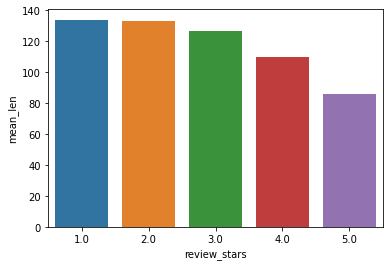

In [ ]:
import seaborn as sns
temp1=reviews.groupby('review_stars')['total_len'].agg('mean').reset_index()
temp1.columns=['review_stars','mean_len']
sns.barplot(x='review_stars', y='mean_len', data=temp1)

In [ ]:
print(temp1)

   review_stars    mean_len
0           1.0  133.932539
1           2.0  133.481619
2           3.0  126.677728
3           4.0  110.050875
4           5.0   86.195401


**Best Review has less mean length**

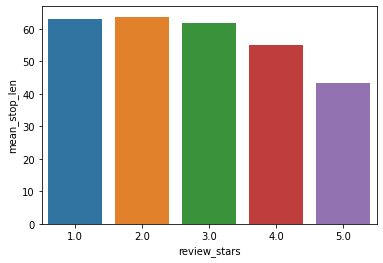

In [ ]:
temp2=reviews.groupby('review_stars')['stop_len'].agg('mean').reset_index()
temp2.columns=['review_stars','mean_stop_len']
sns.barplot(x='review_stars', y='mean_stop_len', data=temp2)

In [ ]:
print(temp2)

   review_stars  mean_stop_len
0           1.0      63.065077
1           2.0      63.679058
2           3.0      61.672646
3           4.0      55.118805
4           5.0      43.291471


**Best review has less stop words**

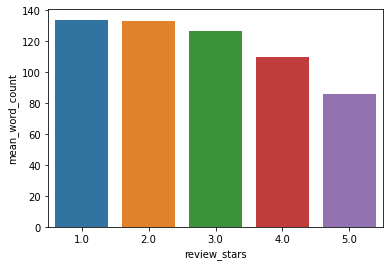

In [ ]:
temp3=reviews.groupby('review_stars')['word_count'].agg('mean').reset_index()
temp3.columns=['review_stars','mean_word_count']
sns.barplot(x='review_stars', y='mean_word_count', data=temp3)

In [ ]:
print(temp3)

   review_stars  mean_word_count
0           1.0       133.932539
1           2.0       133.481619
2           3.0       126.677728
3           4.0       110.050875
4           5.0        86.195401


**Best Review has less words**

In [ ]:
reviews.to_csv('final_feature_reviews.csv', index=False)